In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

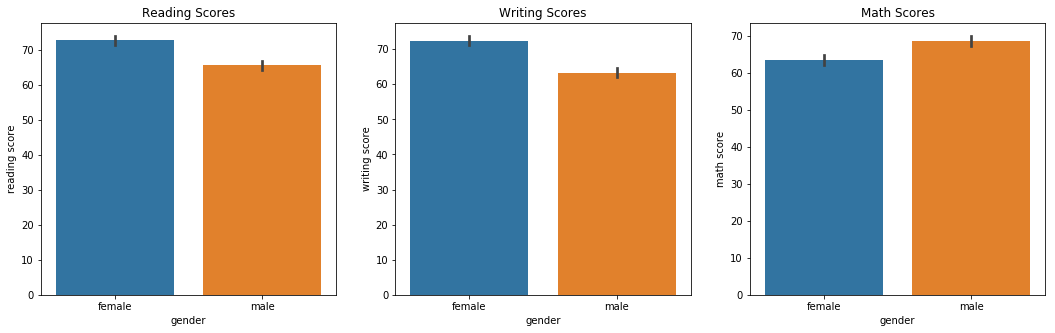

In [3]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students["gender"], students["reading score"])
plt.title("Reading Scores")

plt.subplot(1,3,2)
sns.barplot(students["gender"], students["writing score"])
plt.title("Writing Scores")

plt.subplot(1,3,3)
sns.barplot(students["gender"], students["math score"])
plt.title("Math Scores")

plt.show()

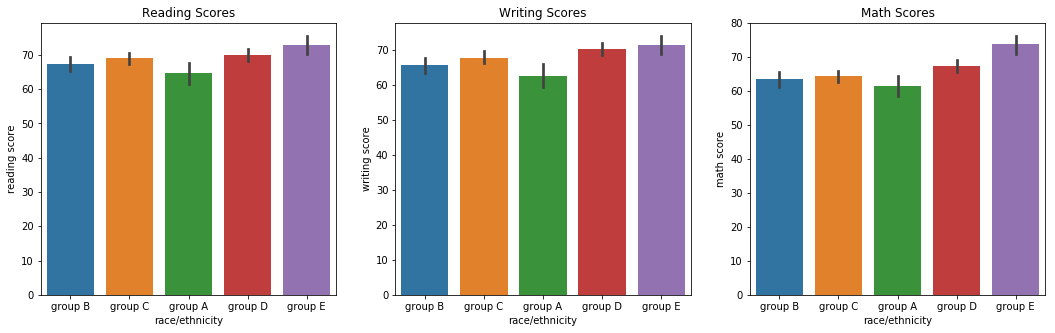

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students["race/ethnicity"], students["reading score"])
plt.title("Reading Scores")

plt.subplot(1,3,2)
sns.barplot(students["race/ethnicity"], students["writing score"])
plt.title("Writing Scores")

plt.subplot(1,3,3)
sns.barplot(students["race/ethnicity"], students["math score"])
plt.title("Math Scores")

plt.show()

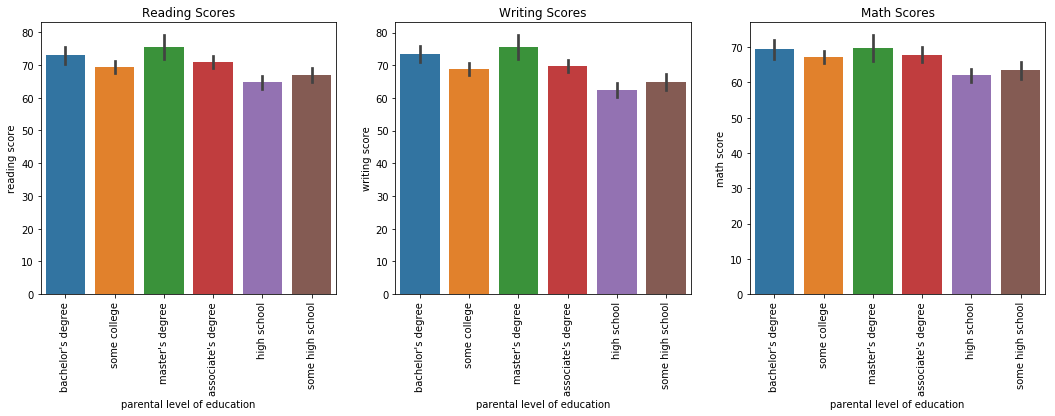

In [5]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students["parental level of education"], students["reading score"])
plt.xticks(rotation=90)
plt.title("Reading Scores")

plt.subplot(1,3,2)
sns.barplot(students["parental level of education"], students["writing score"])
plt.xticks(rotation=90)
plt.title("Writing Scores")

plt.subplot(1,3,3)
sns.barplot(students["parental level of education"], students["math score"])
plt.xticks(rotation=90)
plt.title("Math Scores")

plt.show()

Across all three measureables, we see that there are differences with respect to performances in exams. 

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

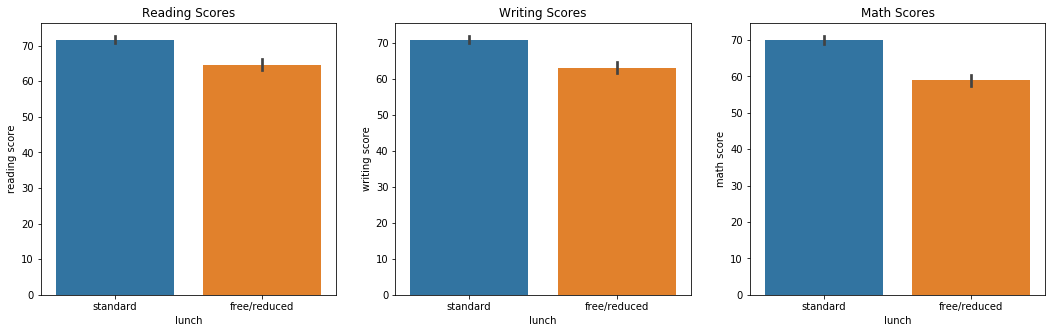

In [6]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(students["lunch"], students["reading score"])
plt.title("Reading Scores")

plt.subplot(1,3,2)
sns.barplot(students["lunch"], students["writing score"])
plt.title("Writing Scores")

plt.subplot(1,3,3)
sns.barplot(students["lunch"], students["math score"])
plt.title("Math Scores")

plt.show()

In [7]:
stats.ttest_ind(students[students["lunch"] == "standard"][["math score", "reading score", "writing score"]],
                students[students["lunch"] == "free/reduced"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([11.83718047,  7.45105647,  8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

Students who recieve the free/reduced lunch have lower scores on average across all three subjects and these differences are statistically significant. This could be due to the fact that students who recieve the free/reduced lunches are not getting as much food which means they are hungrier and doing more poorly on the tests.  

### 3. Does the test preparation course seem to have an effect on the exam performances?

Text(0.5, 1.0, 'Math Scores')

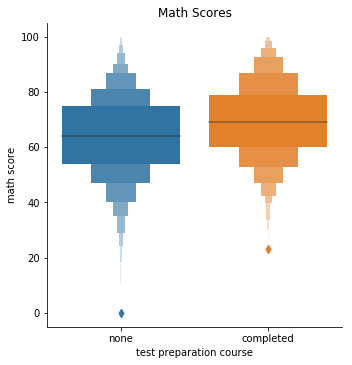

In [8]:
sns.catplot(x = "test preparation course", y = "math score", kind = 'boxen', data = students)
plt.title("Math Scores")

Text(0.5, 1.0, 'Reading Scores')

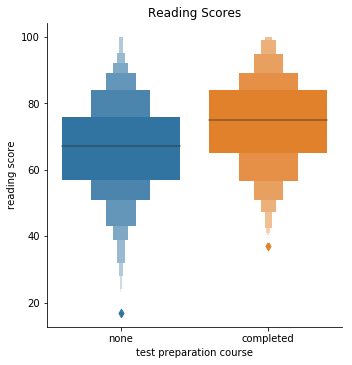

In [9]:
sns.catplot(x = "test preparation course", y = "reading score", kind = 'boxen', data = students)
plt.title("Reading Scores")

Text(0.5, 1.0, 'Writing Scores')

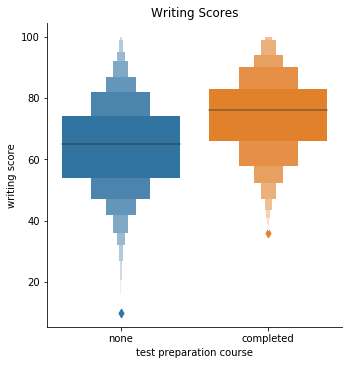

In [10]:
sns.catplot(x = "test preparation course", y = "writing score", kind = 'boxen', data = students)
plt.title("Writing Scores")

In [11]:
stats.ttest_ind(students[students["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
                students[students["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

On average students who complete the test preparation course have higher score across all three exams than students who do not take the course and the t-test results show the differences are statistically significant. 

### 4. Which 2 exam scores are most correlated with each other?

Text(0.5, 1.0, 'correlation matrix (student performance)')

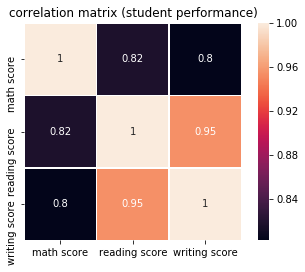

In [12]:
cor_students = students.corr()
sns.heatmap(cor_students, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

From the correlation matrix, reading and writing are the most correlated exam scores. This is evident in the scatterplots as well.

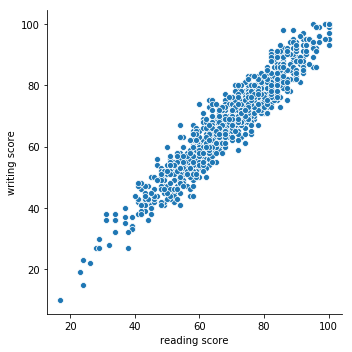

In [13]:
sns.relplot(x = "reading score", y = "writing score", data = students)

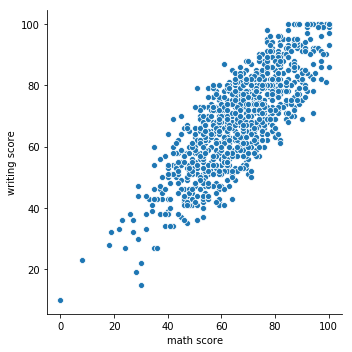

In [14]:
sns.relplot(x = "math score", y = "writing score", data = students)

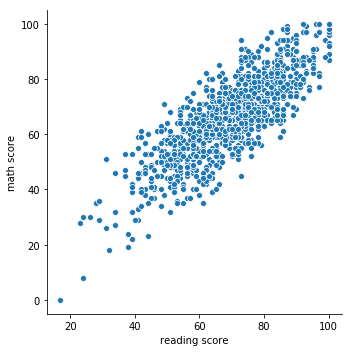

In [15]:
sns.relplot(x = "reading score", y = "math score", data = students)